<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!ls '/content/drive/MyDrive/py-master/ML/9_decision_tree/'

9_decision_tree.ipynb  Exercise  salaries.csv  titanic.jpg


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [12]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/9_decision_tree/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [14]:
inputs = df.drop('salary_more_then_100k', axis=1)
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [15]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lecom = LabelEncoder()
lejob = LabelEncoder()
ledeg = LabelEncoder()

In [17]:
inputs['company_n'] = lecom.fit_transform(inputs['company'])
inputs['job_n'] = lejob.fit_transform(inputs['job'])
inputs['degree_n'] = ledeg.fit_transform(inputs['degree'])

In [18]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [19]:
drop = inputs.drop(['company','job','degree'],axis=1)

In [20]:
drop

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [28]:
from sklearn import tree
model= tree.DecisionTreeClassifier(random_state=123)
model.fit(drop, target)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [29]:
model.score(drop, target)

1.0

In [26]:
model.predict([[2,2,1]])

array([0])

In [27]:
model.predict([[2,0,1]])

array([1])

[Text(152.1818181818182, 199.32, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(91.30909090909091, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(60.872727272727275, 126.83999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(30.436363636363637, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(91.30909090909091, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(121.74545454545455, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(213.05454545454546, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(182.61818181818182, 126.83999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(243.4909090909091, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(213.05454545454546, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(273.92727272727274, 90.6, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3,

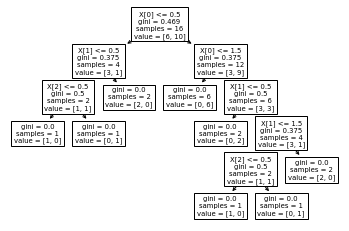

In [37]:
from sklearn.tree import plot_tree
tree.plot_tree(model)

In [38]:
tree.export_graphviz(model,out_file='tree.dot')

In [39]:
from sklearn.externals.six import StringIO  
import pydot 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [44]:
dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("salary.pdf")